In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob

In [ ]:
Kisan = pd.read_csv('/content/Kisan Call center Queries (1).csv')

In [ ]:
Kisan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178939 entries, 0 to 178938
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   questions  178939 non-null  object
 1   answers    178816 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [ ]:
Kisan = Kisan.dropna()

In [ ]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis on 'answers'
Kisan['sentiment'] = Kisan['answers'].apply(get_sentiment)

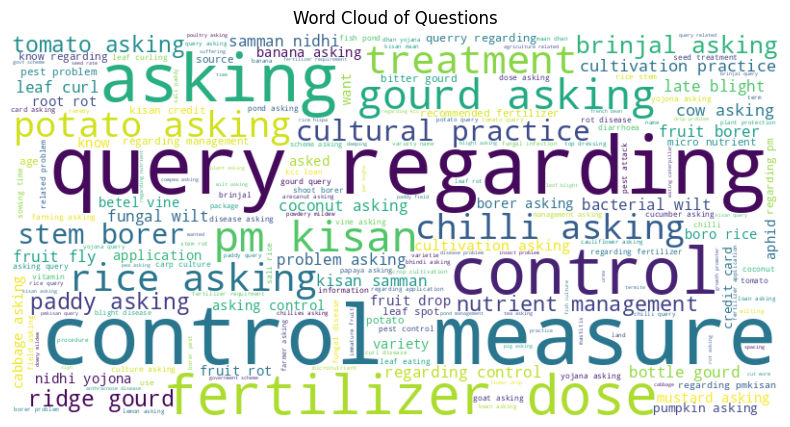

In [ ]:
# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(Kisan['questions']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Questions")
plt.show()


In [ ]:
# Topic Modeling (LDA & NMF)
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_topics = vectorizer.fit_transform(Kisan['questions'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
nmf = NMF(n_components=5, random_state=42)
lda_topics = lda.fit_transform(X_topics)
nmf_topics = nmf.fit_transform(X_topics)

In [ ]:
# Clustering (K-Means & DBSCAN)
kmeans = KMeans(n_clusters=5, random_state=42)
Kisan['kmeans_cluster'] = kmeans.fit_predict(X_topics)
dbscan = DBSCAN()
Kisan['dbscan_cluster'] = dbscan.fit_predict(X_topics)

In [ ]:
# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(Kisan['questions']).toarray()
y = Kisan['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train Supervised Learning Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}
